<a href="https://colab.research.google.com/github/HR-Analysis/AI-ML/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
import pandas as pd
from sklearn.preprocessing import LabelEncoder

uploaded = files.upload()

filename = next(iter(uploaded))

df = pd.read_csv(filename)


if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

if df['Species'].dtype == 'object':
    le = LabelEncoder()
    df['Species'] = le.fit_transform(df['Species'])

df.head()

Saving Iris.csv to Iris.csv


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop('Species', axis=1)
y = df['Species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

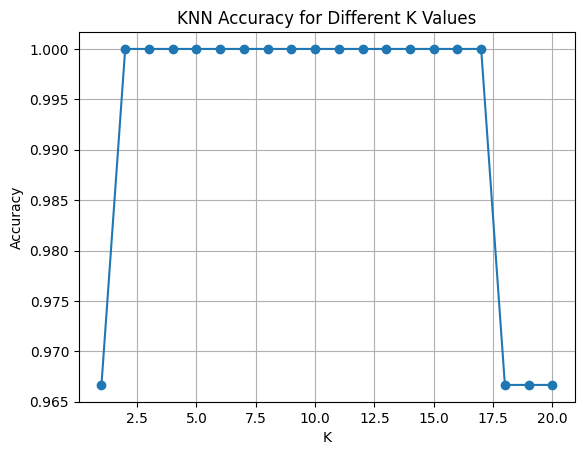

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)


plt.plot(k_values, accuracies, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.grid(True)
plt.show()

Accuracy (K=5): 1.0


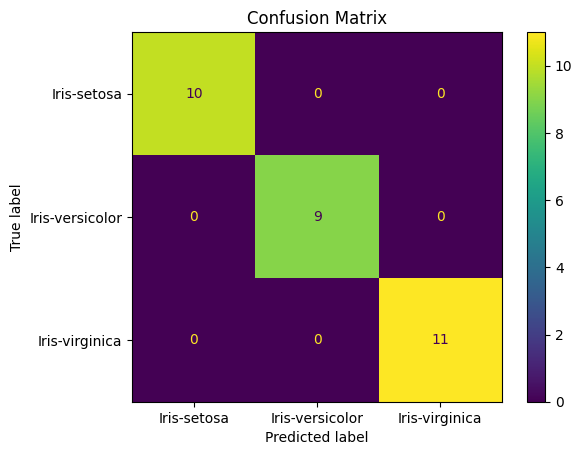

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy (K=5):", accuracy_score(y_test, y_pred))


ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=le.classes_)
plt.title("Confusion Matrix")
plt.show()

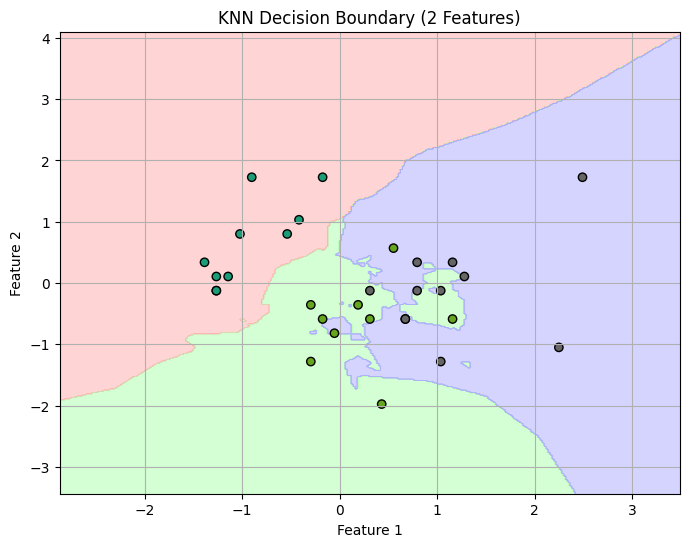

In [9]:
import numpy as np
from matplotlib.colors import ListedColormap
X_2D = X_scaled[:, :2]
X_train2D, X_test2D, y_train2D, y_test2D = train_test_split(X_2D, y, test_size=0.2, random_state=42)

knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train2D, y_train2D)


h = .02
x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)
plt.scatter(X_test2D[:, 0], X_test2D[:, 1], c=y_test2D, edgecolor='k', cmap='Dark2')
plt.title("KNN Decision Boundary (2 Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()